In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("Gemini_1INCHUSD_1h.csv", index_col = ['date'], parse_dates = True)
data_df = data[['open', 'high', 'low', 'close', 'Volume 1INCH', 'Volume USD']]
data_df.head(n=5)

,open,high,low,close,Volume 1INCH,Volume USD
date,,,,,,
2022-04-27 00:00:00,1.2871,1.2932,1.2865,1.2888,428.840257,552.689323
2022-04-26 23:00:00,1.2968,1.2970,1.2589,1.2871,1189.529669,1531.043637
2022-04-26 22:00:00,1.3093,1.3124,1.2961,1.2968,1281.291941,1661.579389
2022-04-26 21:00:00,1.2981,1.3116,1.2959,1.3093,2868.856831,3756.194249
2022-04-26 20:00:00,1.3053,1.3095,1.2900,1.2981,2084.128819,2705.407620


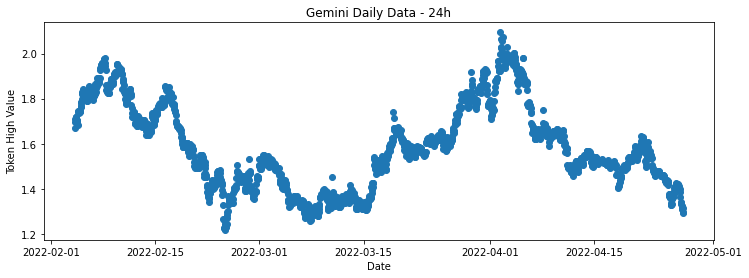

ADF Statistic: -2.1147556823043097
p-value: 0.2386228110842188


In [3]:
#Sample High Data for Autoregressive Integrated Moving Average Model
plt.figure(figsize=[12, 4], )
plt.scatter(data_df.index, data_df['high'])
plt.title('Gemini Daily Data - 24h')
plt.ylabel('Token High Value')
plt.xlabel('Date')

ad_fuller_result = adfuller(data_df['high'])
plt.show()

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')


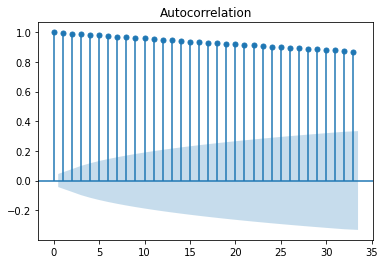

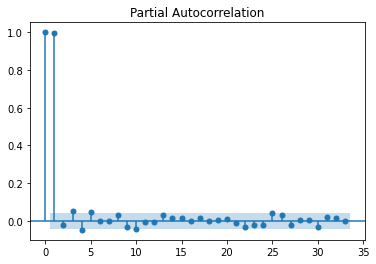

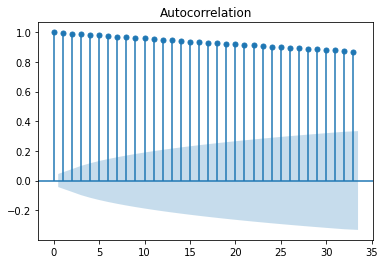

In [4]:
plot_pacf(data['high'])
plot_acf(data['high'])

In [5]:
#Ensure that Data is Stationary (Constant mean and constant variance)
data['high'] = np.log(data['high'])
data['high'] = data['high'].diff()
data = data.drop(data.index[0])
data.head()

,unix,symbol,open,high,low,close,Volume 1INCH,Volume USD
date,,,,,,,,
2022-04-26 23:00:00,1651014000000,1INCH/USD,1.2968,0.002934,1.2589,1.2871,1189.529669,1531.043637
2022-04-26 22:00:00,1651010400000,1INCH/USD,1.3093,0.011804,1.2961,1.2968,1281.291941,1661.579389
2022-04-26 21:00:00,1651006800000,1INCH/USD,1.2981,-0.000610,1.2959,1.3093,2868.856831,3756.194249
2022-04-26 20:00:00,1651003200000,1INCH/USD,1.3053,-0.001602,1.2900,1.2981,2084.128819,2705.407620
2022-04-26 19:00:00,1650999600000,1INCH/USD,1.3203,0.011012,1.2917,1.3053,12134.329536,15838.940343


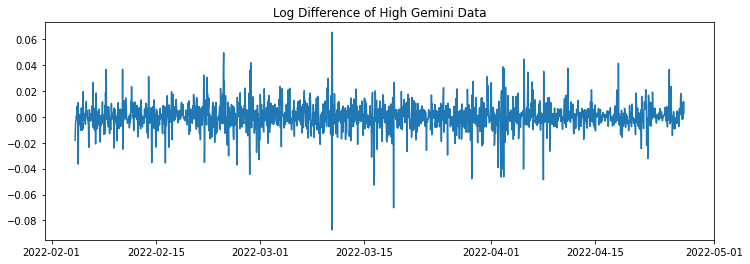

ADF Statistics: -24.918090
P-value: 0.000000
Critical values: 
	1%: -3.433689
	5%: -2.863015
	10%: -2.567555
Reject - Time Series is Stationary


In [6]:
plt.figure(figsize=[12, 4]); # Set dimensions for figure
plt.plot(data['high'])
plt.title("Log Difference of High Gemini Data")
plt.show()

#Test for Stationarity 
X_values = data['high'].values
result = adfuller(X_values)

print("ADF Statistics: %f" % result[0])
print("P-value: %f" % result[1])
print("Critical values: ")

for key, value in result[4].items():
    print("\t%s: %3f" % (key, value))

if result[0] < result[4]["5%"]:
    print("Reject - Time Series is Stationary") 
else: 
    print("Failed to Reject Ho - Time Series is Non-Stationary")